In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Analysing the population density of each major sections of Bangladesh from Worldometer

#### Code to Webscrape the data from Worldometer

In [72]:
# Function to extract population data of largest cities from Worldometer
def extract_population_cities():
    url = 'https://www.worldometers.info/demographics/bangladesh-demographics/#urb'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')
        if table:
            headers = [header.text.strip() for header in table.find_all('th')]
            rows = []
            for row in table.find_all('tr')[1:]:
                cells = row.find_all('td')
                if len(cells) > 0:
                    rows.append([cell.text.strip().replace(',', '') for cell in cells])
            df = pd.DataFrame(rows, columns=headers)
            return df
        else:
            print('Table not found.')
    else:
        print(f'Failed to retrieve the webpage. Status code: {response.status_code}')
    return pd.DataFrame()

#### Presenting a tabular visualisation

In [73]:
df_population_cities = extract_population_cities()
print("Population of Largest Cities:")
display(df_population_cities)

Population of Largest Cities:


#    CITY NAME POPULATION
0    1        Dhaka   10356500
1    2   Chittagong    3920222
2    3       Khulna    1342339
3    4     Rajshahi     700133
4    5      Comilla     389411
5    6     Shibganj     378701
6    7       Natore     369138
7    8      Rangpur     343122
8    9        Tungi     337579
9   10    Narsingdi     281080
10  11     Bagerhat     266388
11  12  Cox's Bazar     253788
12  13      Jessore     243987
13  14     Nagarpur     238422
14  15       Sylhet     237000
15  16   Mymensingh     225126
16  17  Narayanganj     223622
17  18        Bogra     210000
18  19     Dinajpur     206234
19  20      Barisal     202242

#### A deep insight visualisation of the plots

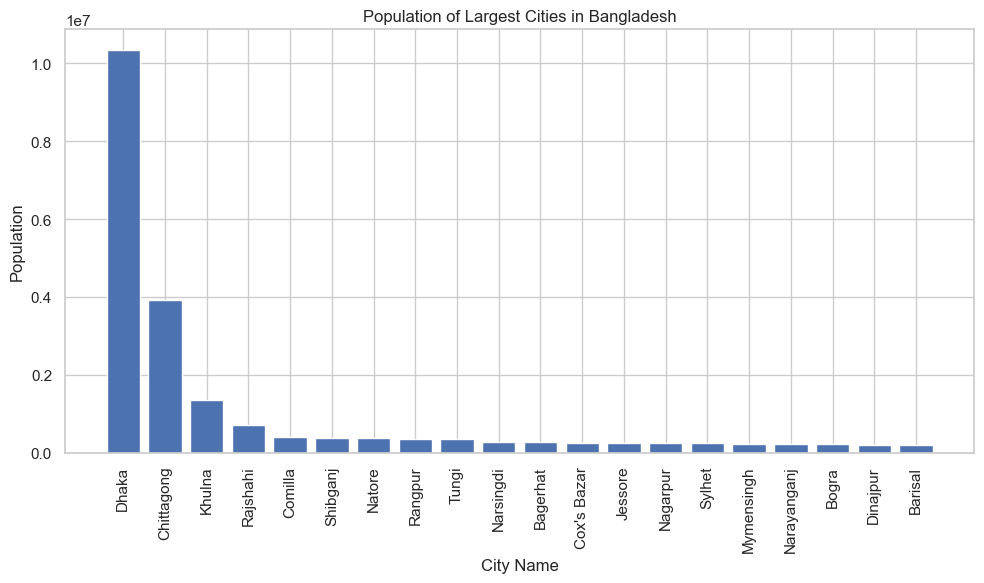

In [74]:
# Plotting Population of Largest Cities
plt.figure(figsize=(10, 6))
plt.bar(df_population_cities['CITY NAME'], df_population_cities['POPULATION'].astype(int))
plt.xlabel('City Name')
plt.ylabel('Population')
plt.title('Population of Largest Cities in Bangladesh')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

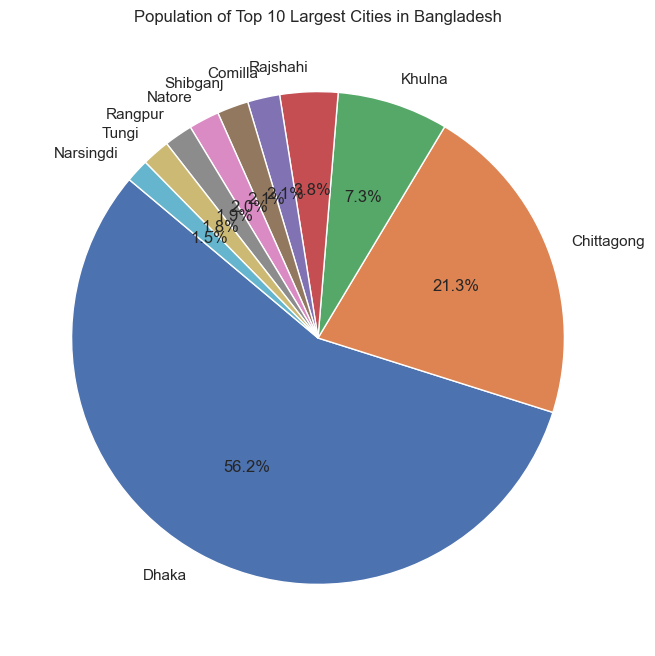

In [75]:
# Pie Chart for Population of Largest Cities (showing top 5 cities for better readability)
top_cities = df_population_cities.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_cities['POPULATION'].astype(int), labels=top_cities['CITY NAME'], autopct='%1.1f%%', startangle=140)
plt.title('Population of Top 10 Largest Cities in Bangladesh')
plt.show()

## Analysing Population Distribution by Age Group in Bangladesh from Datareportal

#### Code to Webscrape the data from Datareportal

In [76]:
# Function to extract population by age from DataReportal
def extract_population_by_age():
    url = 'https://datareportal.com/reports/digital-2024-bangladesh'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        heading = soup.find('h2', string=lambda text: 'Bangladesh’s population by age' in text)
        if heading:
            section = heading.find_next('ul')
            if section:
                percentages = []
                age_groups = []
                for item in section.find_all('li'):
                    percentage = item.find('b').text.strip().replace('\u00a0', ' ').replace(' percent', '')
                    age_group = item.find('span', {'class': 'goldText'}).text.strip().replace('\u00a0', ' ').replace('and', 'to')
                    percentages.append(float(percentage))
                    age_groups.append(age_group)
                df = pd.DataFrame({'Age Group': age_groups, 'Percentage': percentages})
                return df
            else:
                print('List section not found.')
        else:
            print('Heading not found.')
    else:
        print(f'Failed to retrieve the webpage. Status code: {response.status_code}')
    return pd.DataFrame()

In [77]:
df_population_by_age = extract_population_by_age()
print("Population by Age Group:")
display(df_population_by_age)

Population by Age Group:


Age Group  Percentage
0       0 to 4         8.4
1      5 to 12        13.4
2     13 to 17         9.0
3     18 to 24        13.3
4     25 to 34        17.0
5     35 to 44        14.2
6     45 to 54        10.9
7     55 to 64         7.3
8  65 to above         6.4

#### A deep insight visualisation of the plots

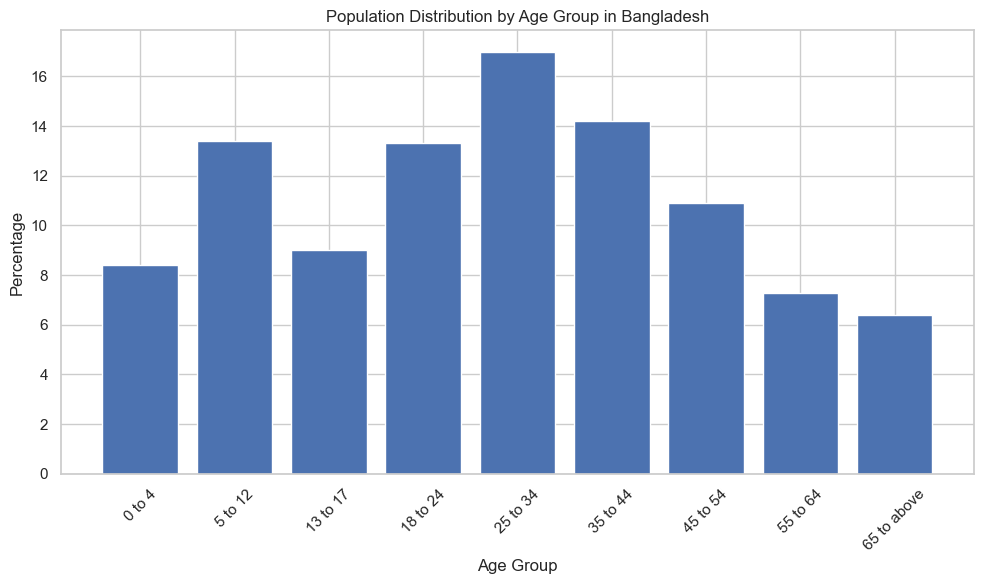

In [78]:
# Plotting Population by Age
plt.figure(figsize=(10, 6))
plt.bar(df_population_by_age['Age Group'], df_population_by_age['Percentage'])
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Population Distribution by Age Group in Bangladesh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

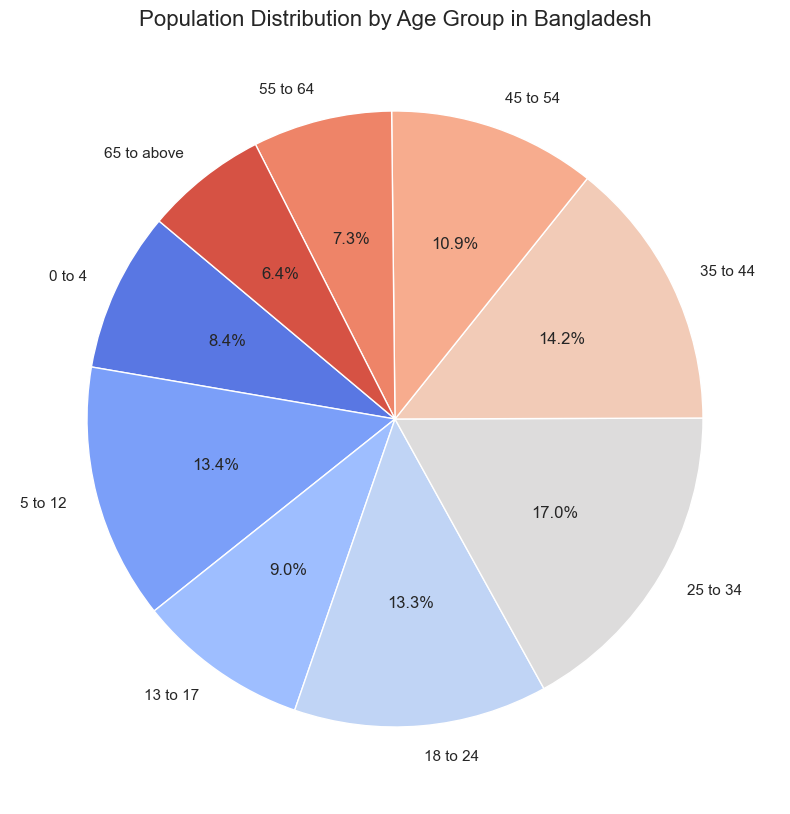

In [79]:
plt.figure(figsize=(10, 10))
plt.pie(df_population_by_age['Percentage'], labels=df_population_by_age['Age Group'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(df_population_by_age)))
plt.title('Population Distribution by Age Group in Bangladesh', fontsize=16)
plt.show()

# Analysing the Network Coverage of top telecom vendors to pinpoint the location of saturated users from npref.com

### Code for extracting the network coverage of the vendors

In [80]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from IPython.display import Image

def capture_map_screenshot(map_url, screenshot_path='map_screenshot.png'):
    # Set up the WebDriver
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')  # Run in headless mode for faster execution
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

    # Load the webpage
    driver.get(map_url)

    # Wait for the cookies banner to appear and then accept it
    try:
        accept_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'OK')]"))
        )
        accept_button.click()
        # Wait a bit for the banner to disappear
        time.sleep(2)
    except Exception as e:
        print("No cookies banner found or unable to click it:", e)

    # Wait for the map to load
    time.sleep(10)  # Adjust the time if necessary

    # Take a screenshot
    driver.save_screenshot(screenshot_path)

    # Close the WebDriver
    driver.quit()

    return screenshot_path


### Analysing the coverage of Robi

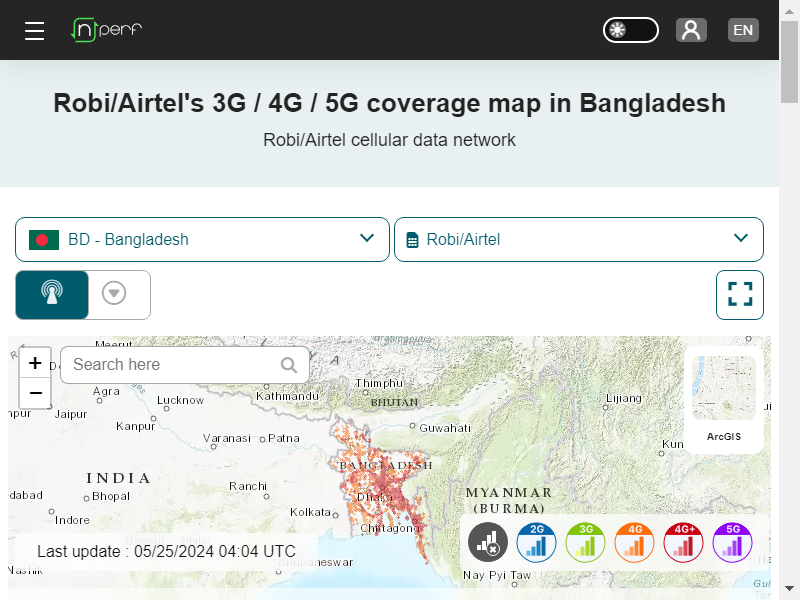

In [81]:
map_url = 'https://www.nperf.com/en/map/BD/-/11597.RobiAirtel/signal/?ll=23.77529123645138&lg=90.70861231501998&zoom=5'
screenshot_path = capture_map_screenshot(map_url)

# Display the screenshot in Jupyter Notebook
Image(screenshot_path)

### Analysing the coverage of Grameenphone

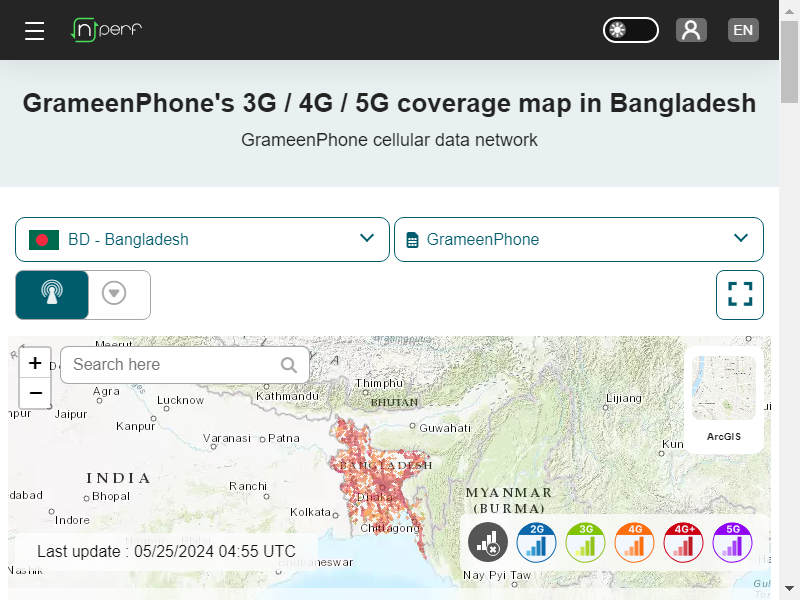

In [82]:
map_url = 'https://www.nperf.com/en/map/BD/-/11131.GrameenPhone/signal/?ll=23.77529123645138&lg=90.70861231501998&zoom=5'
screenshot_path = capture_map_screenshot(map_url)

# Display the screenshot in Jupyter Notebook
Image(screenshot_path)

### Analysing the coverage of TeleTalk

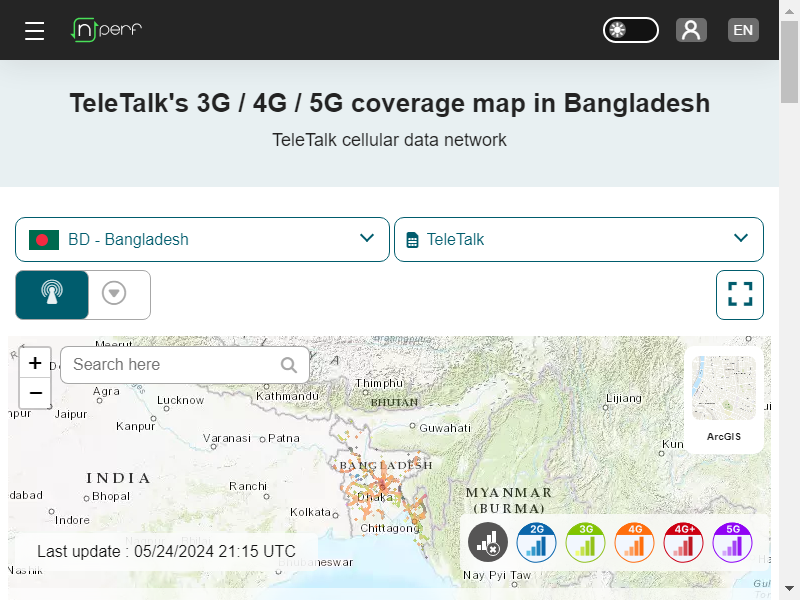

In [83]:
map_url = 'https://www.nperf.com/en/map/BD/-/14226.TeleTalk/signal/?ll=23.77529123645138&lg=90.70861231501998&zoom=5'
screenshot_path = capture_map_screenshot(map_url)

# Display the screenshot in Jupyter Notebook
Image(screenshot_path)

## Selecting Locations based on Visual Analysis

Based on an analysis of population density and network coverage of telecom companies, the following 10 locations in Bangladesh have been selected:

1. **Gulshan 1, Dhaka**: High-traffic business districts ideal for reaching affluent audiences.
2. **Banani, Dhaka**: Known for its upscale real estate, making it perfect for targeting high-income groups.
3. **Mohammadpur, Dhaka**: Densely populated working-class area, ensuring broad reach.
4. **Kalu Shah Bridge Mor, Chittagong**: Strategic location in the port city for high visibility.
5. **Airport Entrance, Sylhet**: High visibility for travelers and locals alike.
6. **Joypurhat Bus Stand, Rajshahi**: Key transit point capturing significant foot traffic.
7. **Economic Zone, Shaikh Hasina Chattor, Khulna**: Targets industrial and local audiences.
8. **Link Road, Cox's Bazar**: Popular tourist area ensuring visibility to both locals and tourists.
9. **Bashundhara City, Dhaka**: Major commercial hub with substantial foot traffic.
10. **Dhaka-Mymensingh Highway, Mymensingh**: Captures commuter traffic effectively.

### Map representation of the Selected points

E:\MegaMind_projects\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


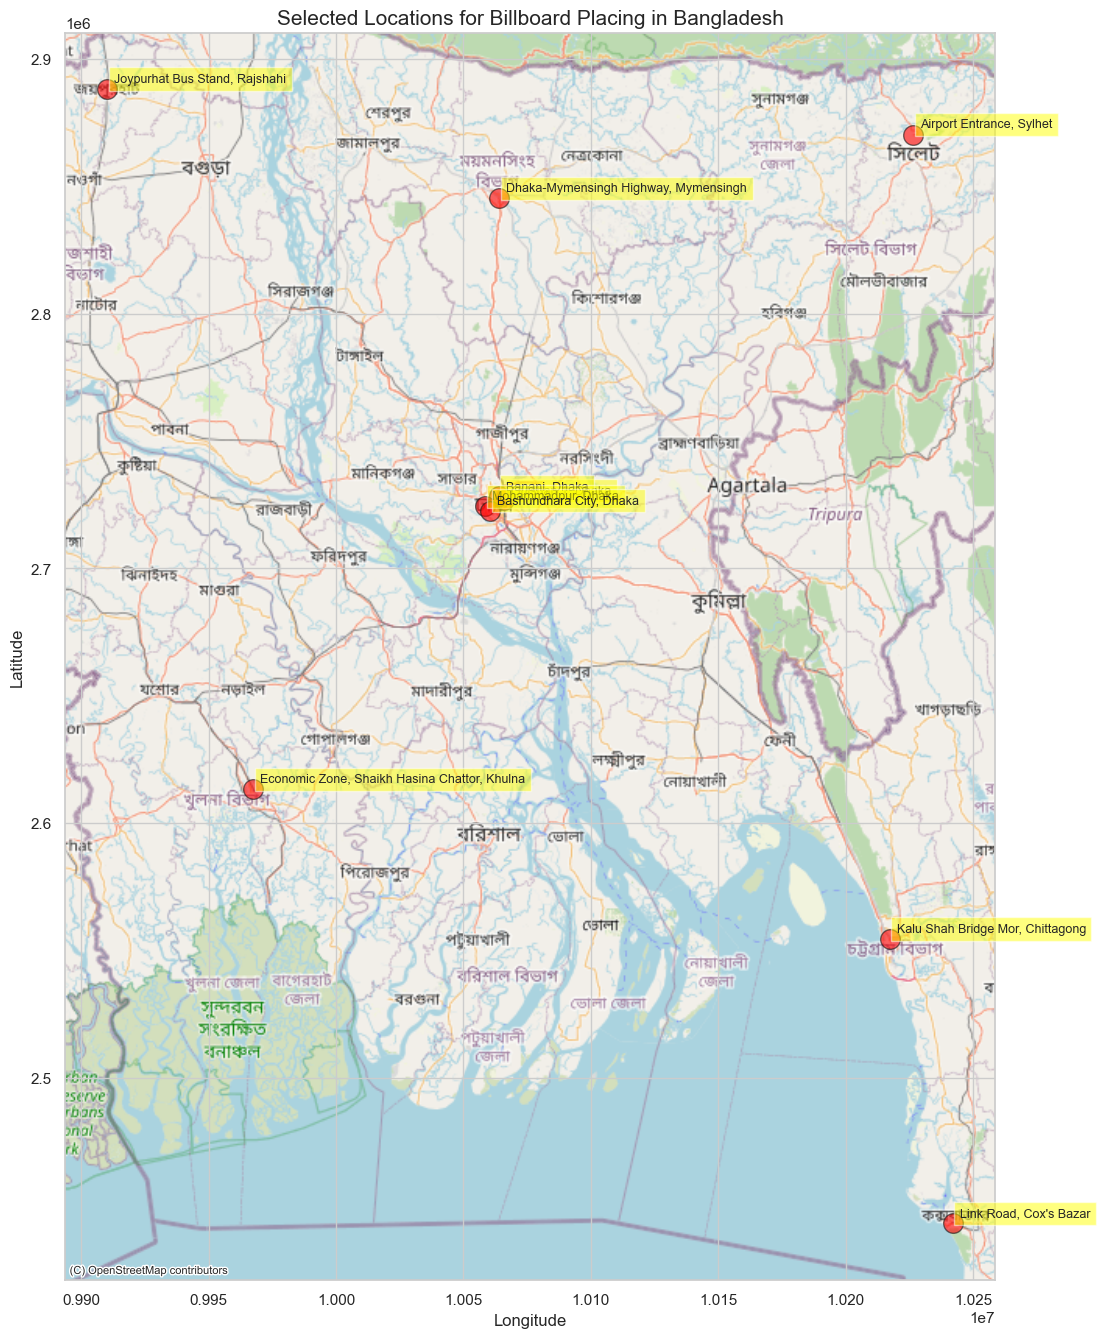

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Define the locations with their coordinates
locations = {
    "Gulshan 1, Dhaka": (23.7806, 90.4250),
    "Banani, Dhaka": (23.7941, 90.4048),
    "Mohammadpur, Dhaka": (23.7615, 90.3580),
    "Kalu Shah Bridge Mor, Chittagong": (22.3569, 91.7832),
    "Airport Entrance, Sylhet": (24.9555, 91.8661),
    "Joypurhat Bus Stand, Rajshahi": (25.1001, 89.0250),
    "Economic Zone, Shaikh Hasina Chattor, Khulna": (22.8456, 89.5403),
    "Link Road, Cox's Bazar": (21.4272, 92.0058),
    "Bashundhara City, Dhaka": (23.7465, 90.3760),
    "Dhaka-Mymensingh Highway, Mymensingh": (24.7511, 90.4074)
}

# Create a GeoDataFrame
gdf_locations = gpd.GeoDataFrame(
    locations.keys(),
    geometry=gpd.points_from_xy([coord[1] for coord in locations.values()], [coord[0] for coord in locations.values()])
)
gdf_locations.columns = ["Location", "geometry"]

# Set the coordinate reference system to WGS84
gdf_locations.crs = {'init': 'epsg:4326'}

# Convert to Web Mercator for contextily
gdf_locations = gdf_locations.to_crs(epsg=3857)

# Plot the map with contextily basemap
fig, ax = plt.subplots(1, 1, figsize=(12, 18))
gdf_locations.plot(ax=ax, color='red', marker='o', markersize=200, alpha=0.6, edgecolor='k')  # Increase markersize to 200

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Annotate locations with a background color
for idx, row in gdf_locations.iterrows():
    plt.annotate(text=row['Location'], xy=(row.geometry.x, row.geometry.y), xytext=(5, 5), textcoords="offset points",
                 bbox=dict(facecolor='yellow', alpha=0.5), fontsize=9)

plt.title('Selected Locations for Billboard Placing in Bangladesh', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()


### Zooming in the location of Dhaka City to get a better understanding of the chosen points

E:\MegaMind_projects\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


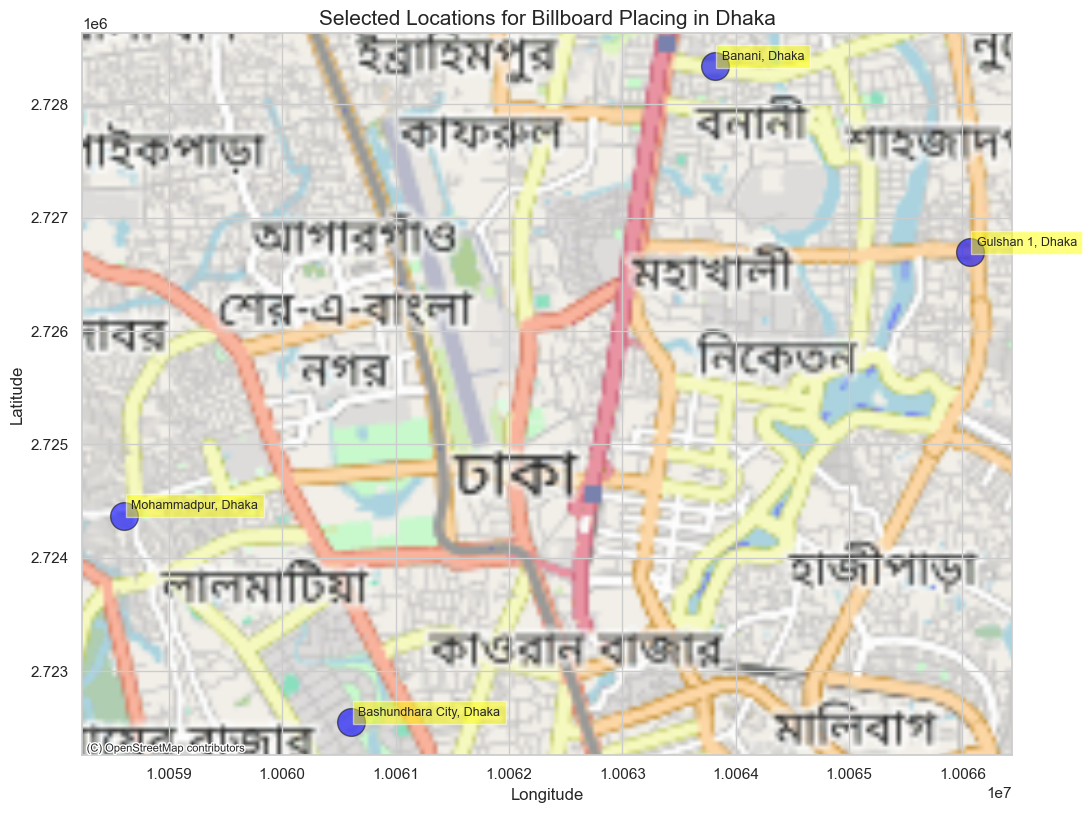

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Define the Dhaka locations with their coordinates
dhaka_locations = {
    "Gulshan 1, Dhaka": (23.7806, 90.4250),
    "Banani, Dhaka": (23.7941, 90.4048),
    "Mohammadpur, Dhaka": (23.7615, 90.3580),
    "Bashundhara City, Dhaka": (23.7465, 90.3760)
}

# Create a GeoDataFrame
gdf_dhaka = gpd.GeoDataFrame(
    dhaka_locations.keys(),
    geometry=gpd.points_from_xy([coord[1] for coord in dhaka_locations.values()], [coord[0] for coord in dhaka_locations.values()])
)
gdf_dhaka.columns = ["Location", "geometry"]

# Set the coordinate reference system to WGS84
gdf_dhaka.crs = {'init': 'epsg:4326'}

# Convert to Web Mercator for contextily
gdf_dhaka = gdf_dhaka.to_crs(epsg=3857)

# Plot the map with contextily basemap
fig, ax = plt.subplots(1, 1, figsize=(12, 18))
gdf_dhaka.plot(ax=ax, color='blue', marker='o', markersize=400, alpha=0.6, edgecolor='k')  # Increase markersize to 400

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Annotate locations with a background color
for idx, row in gdf_dhaka.iterrows():
    plt.annotate(text=row['Location'], xy=(row.geometry.x, row.geometry.y), xytext=(5, 5), textcoords="offset points",
                 bbox=dict(facecolor='yellow', alpha=0.5), fontsize=9)

plt.title('Selected Locations for Billboard Placing in Dhaka', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()


## Conclusion

The selected locations in Bangladesh cover a diverse range of areas, from affluent business districts to densely populated working-class neighborhoods and key transit points. This strategic selection ensures a broad reach and high visibility for telecom network coverage, targeting both local and traveling audiences. The visual map and data analysis support the decision to focus on these areas for maximum impact.
